In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_train_df = pd.read_csv("Predict Calorie Expenditure train.csv")
raw_test_df = pd.read_csv("Predict Calorie Expenditure test.csv")

In [4]:
train_df = raw_train_df.copy()
test_df = raw_test_df.copy()

In [5]:
train_df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [6]:
print("\nColumns in train:", train_df.columns.tolist())


Columns in train: ['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


In [7]:
train_df.shape, test_df.shape

((750000, 9), (250000, 8))

In [8]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4 

(None, None)

In [9]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Text(0.5, 1.0, 'Distribution of Calories')

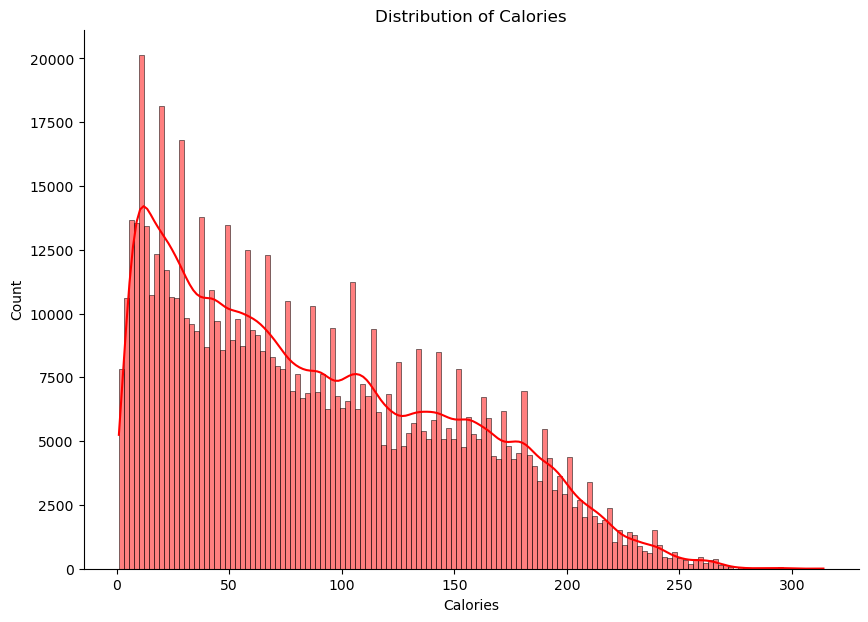

In [10]:
plt.figure(figsize=(10, 7))
sns.histplot(train_df['Calories'], kde=True, color='red')
sns.despine()
plt.title("Distribution of Calories")

<Axes: ylabel='Calories'>

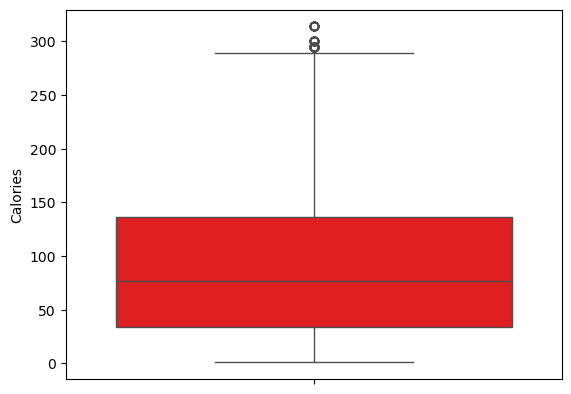

In [11]:
sns.boxplot(train_df['Calories'], color='red')

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

In [13]:
num_cols = train_df.drop(['id', 'Calories'], axis=1).select_dtypes(include='number').columns.tolist()
cat_cols = ['Sex']
print(num_cols, cat_cols)

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'] ['Sex']


In [14]:
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(drop="first"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ]
)

In [15]:
X = train_df.drop(['id', 'Calories'], axis=1)
y = np.log1p(train_df['Calories'])

X_train = X[:500000]
y_train_log = y[:500000]
X_val = X[500000:]
y_val_log = y[500000:]

In [16]:
pipeline.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [17]:
y_pred_log = pipeline.predict(X_val)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [20]:
score = rmsle(y_val_log, y_pred_log)
print(score)

0.06308813538671124


In [21]:
y_val_log, y_pred_log

(500000    4.990433
 500001    4.158883
 500002    5.389072
 500003    4.882802
 500004    2.772589
             ...   
 749995    5.442418
 749996    4.574711
 749997    5.402677
 749998    4.700480
 749999    4.644391
 Name: Calories, Length: 250000, dtype: float64,
 array([4.96791709, 4.15303449, 5.36623973, ..., 5.45605449, 4.66822002,
        4.61300813]))

In [22]:
X_test = test_df.drop('id', axis=1)

In [23]:
y_test_log = pipeline.predict(X_test)

In [24]:
y_test = np.expm1(y_test_log)
y_test

array([ 26.9871945 , 106.91692336,  86.57740835, ...,  73.09007908,
       168.59345886,  78.48567305])

In [25]:
submission = pd.DataFrame({"id": test_df.id, "Calories": y_test})
submission.to_csv('submission.csv', index=False)

In [26]:
test_df.tail()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7
249999,999999,male,31,199.0,96.0,15.0,98.0,39.9


In [27]:
from sklearn.model_selection import KFold

In [28]:
def build_pipeline(regressor):
    numeric_transformer = Pipeline(
        steps=[
            ("scaler", StandardScaler())
        ]
    )
    
    categorical_transformer = Pipeline(
        steps=[
            ("onehot", OneHotEncoder(drop="first"))
        ]
    )
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols)
        ]
    )
    
    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", regressor)
        ]
    )
    return pipeline

In [29]:
def evaluate_model(regressor, X, y, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    rmsle_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        pipeline = build_pipeline(regressor)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_val)
    
        score = rmsle(y_val, preds)
        rmsle_scores.append(score)

        mean_score = np.mean(rmsle_scores)

        final_pipeline = build_pipeline(regressor)
        final_pipeline.fit(X, y)

    print(f"{regressor.__class__.__name__} - Mean RMSLE: {mean_score:.5f}")
    return mean_score, final_pipeline

In [33]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [35]:
lgb_model = LGBMRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, verbosity=0)
cat_model = CatBoostRegressor(verbose=0, random_state=42)

In [41]:
# models = [lgb_model, rf_model, xgb_model, cat_model]
models = [cat_model]

In [43]:
model_results = {}

for model in models:
    rsmle, final_pipeline = evaluate_model(regressor=model, X=X, y=y)
    model_name = model.__class__.__name__
    print(f"{model} rsmle score: {rsmle}")

    model_results[model_name] = {
        "rmsle": rmsle,
        "pipeline": final_pipeline
    }

CatBoostRegressor - Mean RMSLE: 0.05952
<catboost.core.CatBoostRegressor object at 0x00000279AEE8DA00> rsmle score: 0.059522920517506184


Best Result: CatBoostRegressor - Mean RMSLE: 0.05952

In [46]:
model_results

{'CatBoostRegressor': {'rmsle': <function __main__.rmsle(y_true, y_pred)>,
  'pipeline': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['Age', 'Height', 'Weight',
                                                     'Duration', 'Heart_Rate',
                                                     'Body_Temp']),
                                                   ('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(drop='first'))]),
                                                    ['Sex'])])),
                  ('regressor',
                   <catboost.core.CatBoostRegressor object at 0x00000279AEE8DA00>)])}}

In [48]:
catboost_pipeline = model_results['CatBoostRegressor']['pipeline']

In [50]:
catboost_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x00000279AEE8DA00>)])

In [60]:
y_pred_log_cat = catboost_pipeline.predict(X_test)

In [62]:
y_pred_log_cat

array([3.33710036, 4.68846287, 4.47351101, ..., 4.30875119, 5.13344542,
       4.36016293])

In [64]:
y_pred_cat = np.expm1(y_pred_log_cat)

In [66]:
y_pred_cat

array([ 27.13741988, 107.68598641,  86.663972  , ...,  73.34758505,
       168.6004571 ,  77.26988601])

In [68]:
test_df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


In [70]:
submission_df = pd.DataFrame({"id": test_df.id, "Calories": y_pred_cat})
submission_df.to_csv("submission.csv", index=False)

Public Score: 0.05726\
Private Score: 0.05913